# Education Benefits on School Type
---


## Set Up

In [1]:
# Dependencies
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data file paths
bach_source = "Resources/payscaleBachelors.csv"
alum_source = "Resources/payscaleAlumni.csv"
assc_source = "Resources/payscaleAssoc.csv"

In [3]:
# Open source files
raw_bach = pd.read_csv(bach_source)
raw_alum = pd.read_csv(alum_source)
raw_assc = pd.read_csv(assc_source)

raw_alum.count()

Rank                1530
School Name         1530
School Type         1530
Early Career Pay    1530
Mid-Career Pay      1530
% High Meaning      1428
% STEM Degrees      1529
dtype: int64

In [4]:
# Extract relevant info
base_bach = raw_bach[['School Name', 'School Type', 'Early Career Pay', 'Mid-Career Pay', '% STEM Degrees']]
base_alum = raw_alum[['School Name', 'Early Career Pay', 'Mid-Career Pay']]
base_assc = raw_assc[['School Name', 'School Sector', 'Early Career Pay', 'Mid-Career Pay', '% STEM Degrees']]


# Merge Alum and Bach data
comb_alum = pd.merge(base_bach, base_alum, on="School Name", how="left", suffixes=("", " BS Plus"))

# Fix merged school type null values
#comb_alum["School Type BS Only"] = comb_alum["School Type BS Only"].fillna(comb_alum["School Type BS Plus"])
# Fix merged % STEM null values
#comb_alum["% STEM Degrees BS Only"] = comb_alum["% STEM Degrees BS Only"].fillna(comb_alum["% STEM Degrees BS Plus"])

# Find difference between Alum and Bach data
comb_alum["EC Pay Growth"] = comb_alum["Early Career Pay BS Plus"] - comb_alum["Early Career Pay"]
comb_alum["EC Pay Pct"] = comb_alum["EC Pay Growth"] / comb_alum["Early Career Pay"]
comb_alum["MC Pay Growth"] = comb_alum["Mid-Career Pay BS Plus"] - comb_alum["Mid-Career Pay"]
comb_alum["MC Pay Pct"] = comb_alum["MC Pay Growth"] / comb_alum["Mid-Career Pay"]

#display(comb_alum)
comb_alum.isna().sum()

School Name                 0
School Type                 0
Early Career Pay            0
Mid-Career Pay              0
% STEM Degrees              1
Early Career Pay BS Plus    2
Mid-Career Pay BS Plus      2
EC Pay Growth               2
EC Pay Pct                  2
MC Pay Growth               2
MC Pay Pct                  2
dtype: int64

In [5]:
# Strip out School Type Data
#comb_alum["Private"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Private" in s)
#comb_alum["State"] = comb_alum.loc[:, "School Type"].apply(lambda s:"State" in s)
#comb_alum["Ivy League"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Ivy League" in s)
#comb_alum["Sports"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Sports" in s)
#comb_alum["Religious"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Religious" in s)
#comb_alum["Research"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Research" in s)
#comb_alum["Engineering"] = comb_alum.loc[:, "School Type"].apply(lambda s:"Engineering" in s)


In [6]:
# Create slices of data based on School Types
privt_data = comb_alum[comb_alum["School Type"].str.contains("Private") == True]
state_data = comb_alum[comb_alum["School Type"].str.contains("State") == True]
ivylg_data = comb_alum[comb_alum["School Type"].str.contains("Ivy League") == True]
sport_data = comb_alum[comb_alum["School Type"].str.contains("Sport") == True]
relig_data = comb_alum[comb_alum["School Type"].str.contains("Religious") == True]
rsrch_data = comb_alum[comb_alum["School Type"].str.contains("Research") == True]
engnr_data = comb_alum[comb_alum["School Type"].str.contains("Engineering") == True]
lbart_data = comb_alum[comb_alum["School Type"].str.contains("Liberal Arts") == True]
busin_data = comb_alum[comb_alum["School Type"].str.contains("Business") == True]

In [7]:
display(ivylg_data)

,School Name,School Type,Early Career Pay,Mid-Career Pay,% STEM Degrees,Early Career Pay BS Plus,Mid-Career Pay BS Plus,EC Pay Growth,EC Pay Pct,MC Pay Growth,MC Pay Pct
1,Princeton University,"Ivy League, Private School, Research Universit...",69800,147800,0.47,71000.0,151900.0,1200.0,0.017192,4100.0,0.027740
8,Harvard University,"Ivy League, Private School, Research Universit...",69200,140700,0.19,71200.0,147500.0,2000.0,0.028902,6800.0,0.048330
10,Dartmouth College,"Ivy League, Private School, Research Universit...",66300,140300,0.32,68300.0,150800.0,2000.0,0.030166,10500.0,0.074840
19,University of Pennsylvania,"Ivy League, Private School, Research Universit...",68100,134800,0.22,70500.0,143200.0,2400.0,0.035242,8400.0,0.062315
24,Yale University,"Ivy League, Private School, Research Universit...",66800,132100,0.23,70300.0,143300.0,3500.0,0.052395,11200.0,0.084784
25,Brown University,"Ivy League, Private School, Research Universit...",63000,132000,0.39,64600.0,135400.0,1600.0,0.025397,3400.0,0.025758
43,Columbia University in the City of New York,"Ivy League, Private School, Research Universit...",66000,124700,0.30,67500.0,130100.0,1500.0,0.022727,5400.0,0.043304
48,Cornell University,"Ivy League, Private School, Research Universit...",65600,123900,0.43,67700.0,129600.0,2100.0,0.032012,5700.0,0.046005


---
## Level of Education

In [8]:
# Find the mean/median for assoc, bach, and alum data
trip_data = [base_assc, base_bach, base_alum]
trip_lbls = ["Associates", "Bachelors", "Bachelors Plus"]
trip_aecp = [i["Early Career Pay"].mean() for i in trip_data]
trip_amcp = [i["Mid-Career Pay"].mean() for i in trip_data]
trip_mecp = [i["Early Career Pay"].median() for i in trip_data]
trip_mmcp = [i["Mid-Career Pay"].median() for i in trip_data]


In [9]:
# Find the mean/median for top 15 schools for assoc, bach, and alum data
t15_data = [base_assc.head(15), base_bach.head(15), base_alum.head(15)]
t15_aecp = [i["Early Career Pay"].mean() for i in t15_data]
t15_amcp = [i["Mid-Career Pay"].mean() for i in t15_data]
t15_mecp = [i["Early Career Pay"].median() for i in t15_data]
t15_mmcp = [i["Mid-Career Pay"].median() for i in t15_data]

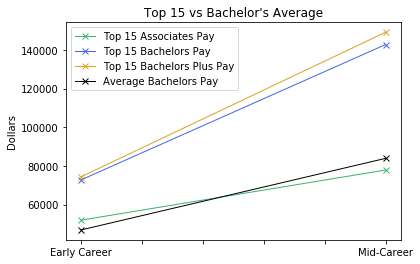

In [10]:
# Create common plot point data
x = [5, 10]
clr = ["mediumseagreen", "royalblue", "goldenrod"]

# Holder for the various plots
t15_plt = []

# Plot the various data for associates, etc...
for i in np.arange(3):
    name = "Top 15 "+trip_lbls[i]+" Pay"
    t15_plt.append(plt.plot(x, [t15_aecp[i], t15_amcp[i]], label=name,
                        linewidth=1, marker="x", color=clr[i]))

# Average bachelors data for comparison
y = [trip_aecp[1], trip_amcp[1]]
t15_plt.append(plt.plot(x, y, linewidth=1, marker="x", color="black", label="Average Bachelors Pay"))

# Add labels and legend
leg = plt.legend(loc="upper left")
plt.xticks(np.arange(5,11), ["Early Career","","","","","Mid-Career"])
yAxisLbl = plt.ylabel("Dollars")
ttl = plt.title("Top 15 vs Bachelor's Average")

---
## School Type Factors
### Ivy League

In [11]:
# Get a subset of overall data for calculations
ivylg_strip = ivylg_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
ivylg_summ = pd.DataFrame(ivylg_strip.mean(), columns=["Mean"])

# Add in SEM
ivylg_summ["SEM"] = ivylg_strip.sem()

# Add median info
ivylg_summ["Median"] = ivylg_strip.median()

ivylg_summ

,Mean,SEM,Median
Early Career Pay,66850.000000,769.972170,66550.000000
Mid-Career Pay,134537.500000,2895.374236,133450.000000
Early Career Pay BS Plus,68887.500000,806.986790,69300.000000
Mid-Career Pay BS Plus,141475.000000,3121.226293,143250.000000
EC Pay Growth,2037.500000,248.522419,2000.000000
EC Pay Pct,0.030504,0.003709,0.029534
MC Pay Growth,6937.500000,1013.117096,6250.000000
MC Pay Pct,0.051634,0.007445,0.047167
% STEM Degrees,0.318750,0.036569,0.310000


### Private Schools

In [12]:
# Get a subset of overall data for calculations
privt_strip = privt_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
privt_summ = pd.DataFrame(privt_strip.mean(), columns=["Mean"])

# Add in SEM
privt_summ["SEM"] = privt_strip.sem()

# Add median info
privt_summ["Median"] = privt_strip.median()

privt_summ

,Mean,SEM,Median
Early Career Pay,46758.829787,228.408683,45700.000000
Mid-Career Pay,83960.531915,577.577681,80450.000000
Early Career Pay BS Plus,47751.705757,235.489554,46600.000000
Mid-Career Pay BS Plus,86373.773987,618.491222,82600.000000
EC Pay Growth,986.993603,21.338704,900.000000
EC Pay Pct,0.021061,0.000445,0.019473
MC Pay Growth,2412.153518,75.971703,2000.000000
MC Pay Pct,0.027473,0.000785,0.025238
% STEM Degrees,0.124266,0.004414,0.080000


### State Schools

In [13]:
# Get a subset of overall data for calculations
state_strip = state_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
state_summ = pd.DataFrame(state_strip.mean(), columns=["Mean"])

# Add in SEM
state_summ["SEM"] = state_strip.sem()

# Add median info
state_summ["Median"] = state_strip.median()

state_summ

,Mean,SEM,Median
Early Career Pay,47097.359155,259.962142,46200.000000
Mid-Career Pay,83850.704225,604.457405,82350.000000
Early Career Pay BS Plus,47882.570423,266.119407,47000.000000
Mid-Career Pay BS Plus,85882.746479,633.189645,84000.000000
EC Pay Growth,785.211268,20.090878,700.000000
EC Pay Pct,0.016655,0.000388,0.015689
MC Pay Growth,2032.042254,60.074352,1900.000000
MC Pay Pct,0.023764,0.000654,0.022545
% STEM Degrees,0.155750,0.005449,0.120000


### Religious Schools

In [14]:
# Get a subset of overall data for calculations
relig_strip = relig_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
relig_summ = pd.DataFrame(relig_strip.mean(), columns=["Mean"])

# Add in SEM
relig_summ["SEM"] = relig_strip.sem()

# Add median info
relig_summ["Median"] = relig_strip.median()

relig_summ

,Mean,SEM,Median
Early Career Pay,44822.321429,221.459068,44600.000000
Mid-Career Pay,79191.071429,592.428630,78200.000000
Early Career Pay BS Plus,45750.358423,226.969046,45500.000000
Mid-Career Pay BS Plus,81257.526882,630.625818,79800.000000
EC Pay Growth,925.089606,23.970790,900.000000
EC Pay Pct,0.020730,0.000542,0.019512
MC Pay Growth,2081.720430,78.286360,1900.000000
MC Pay Pct,0.025609,0.000914,0.024724
% STEM Degrees,0.100643,0.003459,0.080000


### Research Schools

In [15]:
# Get a subset of overall data for calculations
rsrch_strip = rsrch_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
rsrch_summ = pd.DataFrame(rsrch_strip.mean(), columns=["Mean"])

# Add in SEM
rsrch_summ["SEM"] = rsrch_strip.sem()

# Add median info
rsrch_summ["Median"] = rsrch_strip.median()

rsrch_summ

,Mean,SEM,Median
Early Career Pay,51586.513158,401.809119,50200.000000
Mid-Career Pay,95723.026316,967.627269,92950.000000
Early Career Pay BS Plus,52647.368421,419.638756,51050.000000
Mid-Career Pay BS Plus,98702.960526,1045.716173,95650.000000
EC Pay Growth,1060.855263,30.860400,900.000000
EC Pay Pct,0.020241,0.000496,0.018080
MC Pay Growth,2979.934211,116.693693,2600.000000
MC Pay Pct,0.029888,0.000941,0.027759
% STEM Degrees,0.212697,0.009224,0.180000


### Engineering Schools

In [16]:
# Get a subset of overall data for calculations
engnr_strip = engnr_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
engnr_summ = pd.DataFrame(engnr_strip.mean(), columns=["Mean"])

# Add in SEM
engnr_summ["SEM"] = engnr_strip.sem()

# Add median info
engnr_summ["Median"] = engnr_strip.median()

engnr_summ

,Mean,SEM,Median
Early Career Pay,64725.714286,1397.737324,63900.000000
Mid-Career Pay,119300.000000,3053.217066,119700.000000
Early Career Pay BS Plus,65942.857143,1490.977265,65800.000000
Mid-Career Pay BS Plus,123011.428571,3122.684073,122800.000000
EC Pay Growth,1217.142857,175.254231,1000.000000
EC Pay Pct,0.018176,0.002327,0.016032
MC Pay Growth,3711.428571,366.582478,3900.000000
MC Pay Pct,0.031342,0.002789,0.032566
% STEM Degrees,0.707429,0.026677,0.690000


### Sports Schools

In [17]:
# Get a subset of overall data for calculations
sport_strip = sport_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
sport_summ = pd.DataFrame(sport_strip.mean(), columns=["Mean"])

# Add in SEM
sport_summ["SEM"] = sport_strip.sem()

# Add median info
sport_summ["Median"] = sport_strip.median()

sport_summ

,Mean,SEM,Median
Early Career Pay,50322.571429,350.462319,49300.000000
Mid-Career Pay,93702.285714,899.844523,91600.000000
Early Career Pay BS Plus,51374.857143,366.459521,50300.000000
Mid-Career Pay BS Plus,96519.714286,958.854182,94400.000000
EC Pay Growth,1052.285714,30.190170,900.000000
EC Pay Pct,0.020656,0.000490,0.018411
MC Pay Growth,2817.428571,98.108333,2500.000000
MC Pay Pct,0.029215,0.000824,0.027511
% STEM Degrees,0.182914,0.005878,0.160000


In [18]:
# Get a subset of overall data for calculations
busin_strip = busin_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
busin_summ = pd.DataFrame(busin_strip.mean(), columns=["Mean"])

# Add in SEM
busin_summ["SEM"] = busin_strip.sem()

# Add median info
busin_summ["Median"] = busin_strip.median()

busin_summ

,Mean,SEM,Median
Early Career Pay,47224.444444,918.107163,45400.000000
Mid-Career Pay,82477.777778,2544.623742,78000.000000
Early Career Pay BS Plus,47988.888889,924.209858,46100.000000
Mid-Career Pay BS Plus,84546.666667,2708.935085,79600.000000
EC Pay Growth,764.444444,80.349964,700.000000
EC Pay Pct,0.016372,0.001711,0.014516
MC Pay Growth,2068.888889,248.811767,1800.000000
MC Pay Pct,0.023904,0.002458,0.022727
% STEM Degrees,0.055111,0.010601,0.020000


In [19]:
# Get a subset of overall data for calculations
lbart_strip = lbart_data[["Early Career Pay", "Mid-Career Pay", 
                         "Early Career Pay BS Plus", "Mid-Career Pay BS Plus",
                         "EC Pay Growth", "EC Pay Pct", "MC Pay Growth", "MC Pay Pct",
                         "% STEM Degrees"
                        ]]

# Create summary data frame to hold all results starting with mean
lbart_summ = pd.DataFrame(lbart_strip.mean(), columns=["Mean"])

# Add in SEM
lbart_summ["SEM"] = lbart_strip.sem()

# Add median info
lbart_summ["Median"] = lbart_strip.median()

lbart_summ

,Mean,SEM,Median
Early Career Pay,47934.272300,464.378171,47100.000000
Mid-Career Pay,90892.488263,1262.029441,88200.000000
Early Career Pay BS Plus,49348.341232,491.078312,48500.000000
Mid-Career Pay BS Plus,94554.976303,1354.203918,91800.000000
EC Pay Growth,1376.777251,52.389573,1300.000000
EC Pay Pct,0.028473,0.001004,0.027350
MC Pay Growth,3591.943128,205.909989,2800.000000
MC Pay Pct,0.038711,0.002076,0.035264
% STEM Degrees,0.208451,0.007393,0.200000


In [20]:
# Function to return y values for bar chart out of list of dataframes
def dfsToY(lists, ylbl, xlbl):
    return [i.loc[xlbl, ylbl] for i in lists]

In [21]:
# Prep data for bar charts
type_dfs = [privt_summ, state_summ, engnr_summ, rsrch_summ, ivylg_summ, busin_summ, 
            lbart_summ, sport_summ, relig_summ]
type_lbls = ["Private", "State", "Engineering", "Research", "Ivy League", "Business", 
             "Liberal Arts", "Sports", "Religious"]
type_clrs = ["royalblue", "mediumseagreen", "goldenrod", "plum", "firebrick", "lightskyblue", 
             "lightpink","wheat", "lightsteelblue"]
x = np.arange(len(type_lbls))

In [22]:
type_ecp = dfsToY(type_dfs, "Mean", "Early Career Pay")
type_mcp = dfsToY(type_dfs, "Mean", "Mid-Career Pay")
type_pecp = dfsToY(type_dfs, "Mean", "Early Career Pay BS Plus")
type_pmcp = dfsToY(type_dfs, "Mean", "Mid-Career Pay BS Plus")

In [23]:
sem_ecp = dfsToY(type_dfs, "SEM", "Early Career Pay")
sem_mcp = dfsToY(type_dfs, "SEM", "Mid-Career Pay")
sem_pecp = dfsToY(type_dfs, "SEM", "Early Career Pay BS Plus")
sem_pmcp = dfsToY(type_dfs, "SEM", "Mid-Career Pay BS Plus")

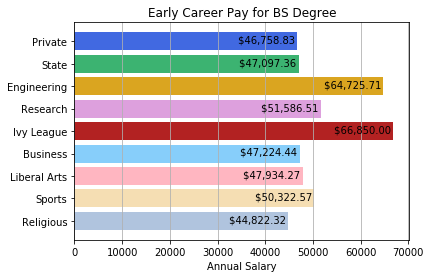

In [24]:
# Early Career Pay Comparisons
ecp_bar = plt.barh(x, type_ecp, tick_label=type_lbls, color=type_clrs)

# Add general plot labels
plt.title("Early Career Pay for BS Degree")
plt.xlabel("Annual Salary")
plt.grid(axis="x")

# Add value labels
for i in ecp_bar.patches:
    w = i.get_width()
    plt.text(w-12500, i.get_y()+.47, ("${:,.2f} ".format(w)), fontsize=10, color="black")

# Invert display order
plt.gca().invert_yaxis()

# Save and display results
plt.savefig("Images/EarlyCareerPayBSOnly.png", bbox_inches="tight")

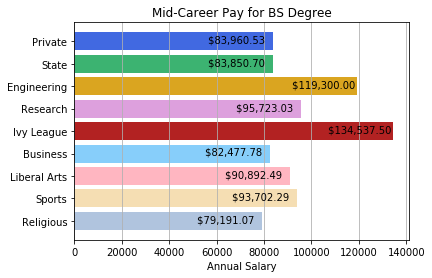

In [25]:
# Early Career Pay Comparisons
mcp_bar = plt.barh(x, type_mcp, tick_label=type_lbls, color=type_clrs)

# Add general plot labels
plt.title("Mid-Career Pay for BS Degree")
plt.xlabel("Annual Salary")
plt.grid(axis="x")

# Add value labels
for i in mcp_bar.patches:
    w = i.get_width()
    plt.text(w-27400, i.get_y()+.47, ("${:,.2f} ".format(w)), fontsize=10, color="black")

# Invert display order
plt.gca().invert_yaxis()

# Save and display results
plt.savefig("Images/MidCareerPayBSOnly.png", bbox_inches="tight")

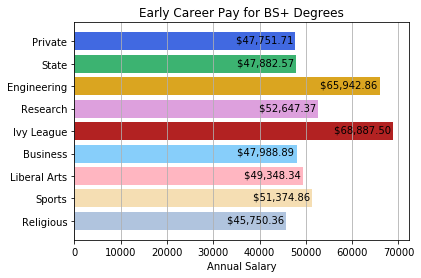

In [26]:
# Early Career Pay Comparisons
pecp_bar = plt.barh(x, type_pecp, tick_label=type_lbls, color=type_clrs)

# Add general plot labels
plt.title("Early Career Pay for BS+ Degrees")
plt.xlabel("Annual Salary")
plt.grid(axis="x")

# Add value labels
for i in pecp_bar.patches:
    w = i.get_width()
    plt.text(w-12800, i.get_y()+.47, ("${:,.2f} ".format(w)), fontsize=10, color="black")

# Invert display order
plt.gca().invert_yaxis()

# Save and display results
plt.savefig("Images/EarlyCareerPayBSPlus.png", bbox_inches="tight")

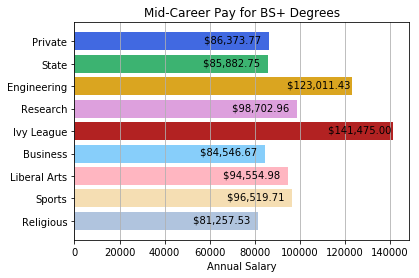

In [27]:
# Early Career Pay Comparisons
pmcp_bar = plt.barh(x, type_pmcp, tick_label=type_lbls, color=type_clrs)

# Add general plot labels
plt.title("Mid-Career Pay for BS+ Degrees")
plt.xlabel("Annual Salary")
plt.grid(axis="x")

# Add value labels
for i in pmcp_bar.patches:
    w = i.get_width()
    plt.text(w-28800, i.get_y()+.47, ("${:,.2f} ".format(w)), fontsize=10, color="black")

# Invert display order
plt.gca().invert_yaxis()

# Save and display results
plt.savefig("Images/MidCareerPayBSPlus.png", bbox_inches="tight")